# Overview

Fot this workshop, same dataset as before was choosen. *Pendigits* is a Pen-Based Recognition of Handwritten Digits Data Set from LIBSVM.

The set is split into two files, learning set of 7,494 samples, and testing one of 3,498 samples. For the purposes of this workshop, only the first one will be used.

There are 10 classes across the dataspace.

# 1. Load data

1. You must load the machine learning dataset that you already used in the Introduction
section. This time the class labels are not going to be used, since we want the clustering
algorithms to discover clusters in the data without any prior information about the
classes.

In [34]:
#Load dataset
from sklearn import datasets

pendings = datasets.load_svmlight_file('/content/pendigits.txt')
X = pendings[0].toarray()

2. Run K-means on the dataset with K ranging from 2 to 10 clusters. Then plot the
resulting Mean Squared Error for each considered value of K. Please see:
http://scikit-learn.org/stable/tutorial/statistical_inference/unsupervised_learning.html

In [35]:
# Calculate mean square errors

from sklearn import cluster
import numpy as np

models = list()
errors = list()

for k in range(2, 11):
  model = cluster.KMeans(n_clusters=k).fit(X)
  models.append(model)
  sum_sq_errors = model.inertia_
  errors.append(sum_sq_errors/len(X))

errors

[11678.381866649326,
 9347.719422156099,
 7763.857928685001,
 6866.160866561779,
 6088.979935557081,
 5508.760580593802,
 5173.818027891562,
 4859.663198508361,
 4606.2829486035835]

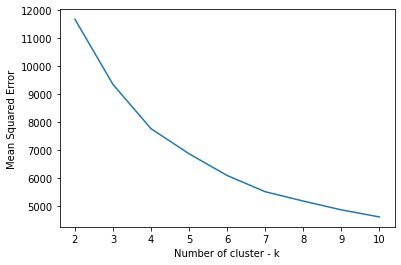

In [36]:
# Plot the chart of mean square errors

import matplotlib.pyplot as plt

plt.figure()
plt.plot(range(2, 11), errors)
plt.xlabel("Number of cluster - k")
plt.ylabel("Mean Squared Error")
plt.show()

Following elbow criterion method, optimal value k for this problem would be 7, as it is the smallest value, for which squarred error is not growing rapidly.

3. Run mean shift clustering with different bandwidths. You will have to find out a
relevant range of possible bandwidths. Then plot the obtained Mean Squared Error and
the number of discovered clusters for the considered bandwidths. Please see:
http://scikit-learn.org/stable/modules/generated/sklearn.cluster.MeanShift.html

In [67]:
# Estimate bandwidth
from sklearn.cluster import estimate_bandwidth

bandwidth = estimate_bandwidth(X)
print(bandwidth)

150.16700191287174


In [80]:
bandwidths = [10, 30, 50, 70, 90, 110, 130, 150]

In [81]:
# Calculate models

from sklearn.cluster import MeanShift

models = list()

for b in bandwidths:
  cluster = MeanShift(bandwidth=b).fit(X)
  models.append(cluster)

In [94]:
# Calculate data for the plots

import math

nr_of_clusters = list();
errors = list()

for m in models:
  nr_of_clusters.append(len(m.cluster_centers_))
  sum_sq_errors = 0
  for i in range(len(X)):
    sum_sq_errors += math.dist(X[i], m.cluster_centers_[m.labels_[i]])
  sum_sq_errors /= len(X)
  errors.append(sum_sq_errors)

print(nr_of_clusters)
print(errors)

[7343, 1116, 117, 26, 13, 2, 1, 1]
[0.17604421860913777, 25.806215651038727, 50.84647704463262, 62.16156246237022, 74.77129060397984, 113.39573996415712, 122.92589113173243, 122.33802795322393]


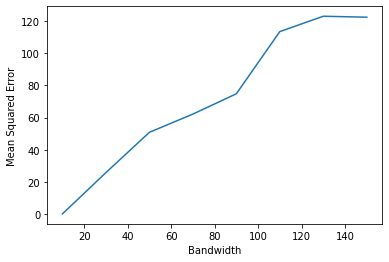

In [95]:
plt.figure()
plt.plot(bandwidths, errors)
plt.xlabel("Bandwidth")
plt.ylabel("Mean Squared Error")
plt.show()

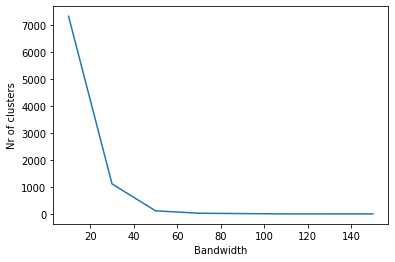

In [96]:
plt.figure()
plt.plot(bandwidths, nr_of_clusters)
plt.xlabel("Bandwidth")
plt.ylabel("Nr of clusters")
plt.show()

As we can see in the 2nd graph, number of clusters significantly decreases for bandwidth values bigger than 30. Moreover, it becomes almost steady for values bigger then 50.

On the other hand, mean square error significantly increases until value of 110.

Tkaing both this information into account, best bandwidth value would be from the range [30;50]. However, error for value 30 would be half of that for value of 50, which means this value wouldprobably be better. Unless we want to compromise between nr of clusters and error, then value of 40 would be the best.